------
### Metis: Project McNulty 
>  Neha Gupta                
>  Date: 2/13/2019
-------

### Import Libraries

In [53]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from rfpimp import *
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

In [9]:
feature_of_all_train_df_clean = pd.read_csv('../DataSet/feature_of_all_train_df_clean.csv')
X = feature_of_all_train_df_clean.iloc[:, 2:-1]
y = feature_of_all_train_df_clean.outcome

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train.shape

# X_test.shape

# y_train.shape

# y_test.shape

In [11]:
SMOTE_X_resampled, SMOTE_y_resampled  = SMOTE(random_state=30).fit_sample(X, y)
Counter(SMOTE_y_resampled)

Counter({0.0: 1881, 1.0: 1881})

In [12]:
SMOTE_X_train, SMOTE_X_test, SMOTE_y_train, SMOTE_y_test = train_test_split(SMOTE_X_resampled,SMOTE_y_resampled,test_size = 0.3,random_state=42)

In [13]:
ADASYN_X_resampled, ADASYN_y_resampled= ADASYN(random_state=30).fit_sample(X, y)
Counter(ADASYN_y_resampled)

Counter({0.0: 1881, 1.0: 1879})

In [14]:
ADASYN_X_train, ADASYN_X_test, ADASYN_y_train, ADASYN_y_test = train_test_split(ADASYN_X_resampled,ADASYN_y_resampled,test_size = 0.3, random_state=42)

## Logistic Regression

__Logistic Regression with SMOTE__

In [15]:
LogReg_SMOTE = LogisticRegression(solver='lbfgs', max_iter=1000)
LogReg_SMOTE.fit(SMOTE_X_train, SMOTE_y_train)


y_pred_SMOTE = LogReg_SMOTE.predict(SMOTE_X_test)

print(metrics.f1_score(SMOTE_y_test, y_pred_SMOTE, average='weighted'))

0.7880005654639636


__Logistic Regression with ADASYN__

In [16]:
LogReg_ADASYN = LogisticRegression(solver='lbfgs', max_iter=1000)
LogReg_ADASYN.fit(ADASYN_X_train, ADASYN_y_train)

y_pred_ADASYN = LogReg_ADASYN.predict(ADASYN_X_test)

print(metrics.f1_score(ADASYN_y_test, y_pred_ADASYN, average='weighted'))

0.7650779796664828


### HyperParameter Tuning for Logistic Regression

In [17]:
# Hyper Parameter for Logistic Regression
log_param_grid={'C':np.logspace(-3, 3, 7), 'penalty':['l1', 'l2']}
logreg = LogisticRegression(solver='liblinear')
log_grid = GridSearchCV(logreg, log_param_grid, cv=10, n_jobs=8, scoring='roc_auc')

## ----------------------- Applying Best Parameter
log_grid.fit(SMOTE_X_train, SMOTE_y_train)

# Final res
bestClf = log_grid.best_estimator_
print(bestClf)

bestClf.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = bestClf.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
0.7908442681426321


# KNN Model

__KNN with SMOTE__

Text(0, 0.5, 'Cross-Validated f1 Score')

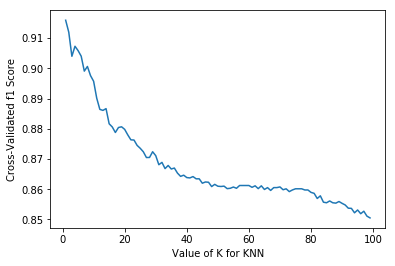

In [24]:
k_range = list(range(1, 100))
k_scores = {}
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, SMOTE_X_train, SMOTE_y_train, cv=10, scoring='f1')
  k_scores[k] = scores.mean()

plt.plot(k_range, k_scores.values())
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated f1 Score')

In [25]:
best_k = -1
max_score = -1
for k,score in k_scores.items():
    if score > max_score:
        best_k = k
        max_score = score
print(best_k)
print(max_score)

1
0.9159046160322871


__KNN with SMOTE__

In [26]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(SMOTE_X_train, SMOTE_y_train)
y_pred = knn.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.9167353833051443


__KNN with ADASYN__

In [27]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(ADASYN_X_train, ADASYN_y_train)
y_pred = knn.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.9192663039346354


### HyperParameter Tuning for KNN

In [20]:
# Hyper Parameter for KNN
knn_param = {'n_neighbors' : range(1,200,10), 'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
             'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_param, cv=10, n_jobs=8, scoring='roc_auc')
knn_grid.fit(SMOTE_X_train, SMOTE_y_train)

## ----------------------- Applying Best Parameter
# Final res
bestClf = knn_grid.best_estimator_
print(bestClf)

bestClf.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = bestClf.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='distance')
0.8918821082793104


In [29]:
from joblib import dump, load
dump(knn, '../HumanVSBotApp/data/knn.joblib') 

['../HumanVSBotApp/data/knn.joblib']

# Decision Tree

__Decision Tree with SMOTE__

In [30]:
dtree = DecisionTreeClassifier()
dtree.fit(SMOTE_X_train, SMOTE_y_train)
y_pred = dtree.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.914088382340001


__Decision Tree with ADASYN__

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(ADASYN_X_train, ADASYN_y_train)
y_pred = dtree.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.917560902642645


### HyperParameter Tuning for Decision Tree

In [21]:
# Hyper Parameter for Decision Tree
dectree_param_grid={'min_samples_split' : range(10,500,10), 'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth': range(1,10,2), 'criterion':['gini','entropy'], 'random_state':[123]}
dtreee = DecisionTreeClassifier()
dtreee_grid = GridSearchCV(dtreee, dectree_param_grid, cv=10, n_jobs=8, scoring='roc_auc')
dtreee_grid.fit(SMOTE_X_train, SMOTE_y_train)

## ----------------------- Applying Best Parameter
# Final res
bestClf = knn_grid.best_estimator_
print(bestClf)

bestClf.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = bestClf.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='distance')
0.8918821082793104


# Random Forest Mddel

__Random Forest with SMOTE__

In [24]:
clf = RandomForestClassifier(n_estimators=600,max_depth=5,min_samples_leaf=2)

clf.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = clf.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.8740596715102785


__Random Forest with ADASYN__

In [34]:
clf = RandomForestClassifier(n_estimators=600,max_depth=5,min_samples_leaf=2)

clf.fit(ADASYN_X_train, ADASYN_y_train)

y_pred = clf.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.8686093899780968


### HyperParameter Tuning for Random Forest

In [18]:
# Hyper Parameter for RandomForestClassifier
HP_range = np.array([ 5, 50, 100])
HP2_range = np.array([10, 301, 401, 501])
grid = GridSearchCV(RandomForestClassifier(n_estimators=300, max_depth=None,
                                                                   max_features='auto', class_weight='balanced_subsample'),
                    {'max_depth' : HP_range,
                    'n_estimators' : HP2_range},
                   cv=10, n_jobs=8, scoring='roc_auc')
grid.fit(SMOTE_X_train, SMOTE_y_train)

# Final res
bestClf = grid.best_estimator_
print(bestClf)
## ----------------------- Applying Best Parameter
bestClf.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = bestClf.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=100, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=301, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.9468593769442629


__Feature Importance with Forest Random__

In [38]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [39]:
print(feature_importances)

                                      importance
average_bids_per_auction                0.288724
bid_count                               0.240680
avg_bids_auction                        0.095679
num_auction_won                         0.088288
percentage_win                          0.061973
num_auction                             0.056541
ip_count                                0.050930
country_count                           0.033610
average_distinct_dev_per_auction        0.033568
average_distinct_country_per_auction    0.025438
competitors                             0.024569
average_distinct_merc_per_auction       0.000000


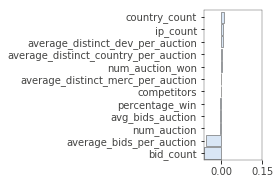

In [58]:
I = importances(clf, X, y)
plot_importances(I)
plt.savefig('merc_count_auction.png') 

In [59]:
from joblib import dump, load
dump(knn, '../HumanVSBotApp/data/knn.joblib') 

['../HumanVSBotApp/data/knn.joblib']

# Naive Bayes

__Naive Bayes with SMOTE__

In [37]:
model = GaussianNB()
model.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = model.predict(SMOTE_X_test)


print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.5689095437220135


__Naive Bayes with ADASYN__

In [38]:
model = GaussianNB()
model.fit(ADASYN_X_train, ADASYN_y_train)

y_pred = model.predict(ADASYN_X_test)


print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.6505782119694129


__No HyperParameter Tuning for Naive Bayes model https://stats.stackexchange.com/questions/299842/why-grid-search-is-not-performed-for-naive-bayes-classifier__

## SVM

__SVM with SMOTE__

In [40]:
model = SVC(kernel="linear", C=0.025)
# model = svm.svc(kernel='linear', c=1, gamma=1) 
model.fit(SMOTE_X_train,SMOTE_y_train)
y_pred = model.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

0.7944076960162201


__SVM with ADASYN__

In [320]:
model = SVC(kernel="linear", C=0.025)
# model = svm.svc(kernel='linear', c=1, gamma=1) 
model.fit(ADASYN_X_train, ADASYN_y_train)
y_pred = model.predict(ADASYN_X_test)
print(metrics.f1_score(ADASYN_y_test, y_pred, average='weighted'))

0.7513873161296856


### HyperParameter Tuning for SVM

In [42]:
# Hyper Parameter for SVM
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
smv_param_grid = {'C': Cs, 'gamma' : gammas}
svm_grid = GridSearchCV(SVC(kernel='rbf'), smv_param_grid, cv=10, n_jobs=8, scoring='roc_auc')
svm_grid.fit(SMOTE_X_train, SMOTE_y_train)

## ----------------------- Applying Best Parameter
# Final res
bestClf = svm_grid.best_estimator_
print(bestClf)

bestClf.fit(SMOTE_X_train, SMOTE_y_train)

y_pred = bestClf.predict(SMOTE_X_test)
print(metrics.f1_score(SMOTE_y_test, y_pred, average='weighted'))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8673817679513803
